# Predicting House Prices in Boston

The aim of this project is to predict the house prices in Boston using a Linear Regression model

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
sns.set(color_codes = True)
sns.set(style="darkgrid")
sns.set_palette("deep")

In [2]:
# Loading the boston dataset from sklearn
boston = datasets.load_boston()

In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
#Data Description 
#print(boston.DESCR)

In [6]:
# Loading the dataset as a pandas data frame 
boston_df = pd.DataFrame(data= boston.data,columns = boston.feature_names) 
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_df.shape

(506, 13)

Let's add the Target Variable to the dataframe so we can check for Correlation and Summary Statistics

In [8]:
#Adding the target variable to the dataframe for analysis 
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


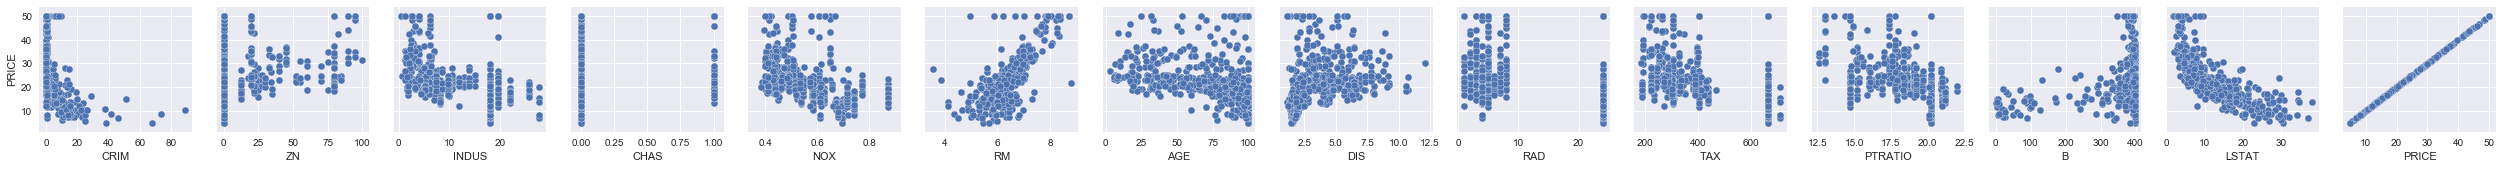

In [10]:
#Understanding our target variable's corelation with our independent variables 
sns.pairplot(boston_df,x_vars=boston_df.columns,y_vars='PRICE')

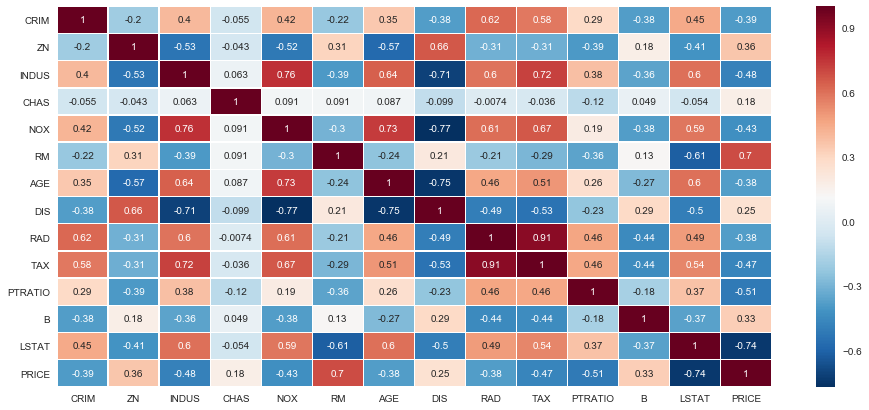

In [11]:
#Correlation Matrix
corr = boston_df.corr()
plt.figure(figsize = (16,7))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot = True,cmap="RdBu_r",linewidths=.5)

From the correlation matrix above we can find the features that have the best correlation with our target variable (PRICE). We can see that RM has the highest positive correlation of 0.7 and LSTAT has the highest negative correlation of 0.74. Therefore, these two are our top predictors for our Linear Regression model. 


In [12]:
#defining the independent variables by removing the Price column  
X = boston_df.drop(columns = ['PRICE'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
# defining the target variable 
y = boston.target # set the target variable

In [14]:
## Splitting the dataset into Training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)


## Feature Selection

In [15]:
## Flag intermediate output

#show_steps = True   # for testing/debugging
show_steps = False  # without showing steps

In [16]:
## Use Forward Feature Selection to pick a good model

# start with no input variables
included = []
r2_list = []
adjusted_r2_list = []
model = LinearRegression()
n = X_test.shape[0]

for _ in range(X.shape[1]):
    # keep track of model and parameters
    best = ('', 0, 0)
    # list the input variables to be evaluated
    excluded = list(set(X.columns) - set(included))
    # for each remaining feature to be evaluated
    for new_column in excluded:
        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_test[included + [new_column]], y_test)
        # number of features in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        # if model improves
        if adjusted_r2 > best[2]:
            # record new parameters
            best = (new_column, r2, adjusted_r2)
    # END for new_column in excluded

    r2_list.append(best[1])
    adjusted_r2_list.append(best[2])

    included.append(best[0])
    excluded = list(set(excluded) - set(best[0]))
    print('Add %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % (best))

print('')
print('Resulting features:')
print(', '.join(included))

Add LSTAT with R^2 = 0.489 and adjusted R^2 = 0.485
Add RM   with R^2 = 0.600 and adjusted R^2 = 0.594
Add PTRATIO with R^2 = 0.651 and adjusted R^2 = 0.644
Add DIS  with R^2 = 0.661 and adjusted R^2 = 0.652
Add NOX  with R^2 = 0.695 and adjusted R^2 = 0.685
Add ZN   with R^2 = 0.703 and adjusted R^2 = 0.691
Add TAX  with R^2 = 0.705 and adjusted R^2 = 0.691
Add RAD  with R^2 = 0.721 and adjusted R^2 = 0.706
Add CRIM with R^2 = 0.721 and adjusted R^2 = 0.703
Add INDUS with R^2 = 0.720 and adjusted R^2 = 0.700
Add CHAS with R^2 = 0.719 and adjusted R^2 = 0.697
Add AGE  with R^2 = 0.717 and adjusted R^2 = 0.692
Add B    with R^2 = 0.711 and adjusted R^2 = 0.684

Resulting features:
LSTAT, RM, PTRATIO, DIS, NOX, ZN, TAX, RAD, CRIM, INDUS, CHAS, AGE, B


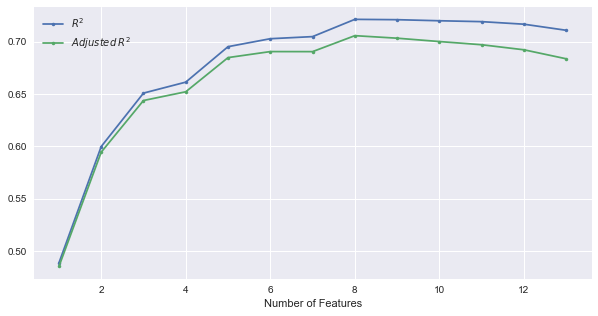

In [17]:
## Chart both R^2 and Adjusted R^2

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(range(1, 14), r2_list, label = "$R^2$",marker='.')
plt.plot(range(1, 14), adjusted_r2_list, label = "$Adjusted \: R^2$",marker='.')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

Comparing the R Square and the Adjusted R Square in the chart we can see that the best number of features for our model will be between 5 and 7 since the variation between R square and Adjusted R square increases at 8 features. 


In [18]:
## Use Forward Feature Selection to select the best predictors

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]],y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_test[included + [new_column]],y_test) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) ) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature LSTAT with R^2 = 0.489 and adjusted R^2 = 0.485
Added feature RM   with R^2 = 0.600 and adjusted R^2 = 0.594
Added feature PTRATIO with R^2 = 0.651 and adjusted R^2 = 0.644
Added feature DIS  with R^2 = 0.661 and adjusted R^2 = 0.652
Added feature NOX  with R^2 = 0.695 and adjusted R^2 = 0.685
Added feature ZN   with R^2 = 0.703 and adjusted R^2 = 0.691

Resulting features:
LSTAT, RM, PTRATIO, DIS, NOX, ZN


Based on our Forward Selection model the best predictors for model are LSTAT, RM, PTRATIO, DIS, NOX, ZN. 

# Modelling

## Linear Regression - All features

In [19]:
#instantiate
lr = LinearRegression()

# fitting the model to the training data (learn the coefficients)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Intercept and Coefficients
print(lr.intercept_)
print(lr.coef_)

31.682148582134108
[-1.32774155e-01  3.57812335e-02  4.99454423e-02  3.12127706e+00
 -1.54698463e+01  4.04872721e+00 -1.07515901e-02 -1.38699758e+00
  2.42353741e-01 -8.69095363e-03 -9.11917342e-01  1.19435253e-02
 -5.48080157e-01]


In [21]:
# pairing the feature names with the coefficients
list(zip(boston.feature_names, lr.coef_))

[('CRIM', -0.13277415503796294),
 ('ZN', 0.03578123348018386),
 ('INDUS', 0.04994544228281334),
 ('CHAS', 3.121277059046745),
 ('NOX', -15.469846273232328),
 ('RM', 4.048727207582057),
 ('AGE', -0.01075159010469672),
 ('DIS', -1.38699758252364),
 ('RAD', 0.24235374106306823),
 ('TAX', -0.008690953630031948),
 ('PTRATIO', -0.9119173424173737),
 ('B', 0.011943525262173736),
 ('LSTAT', -0.548080156834556)]

In [22]:
#Making Prediction
y_pred = lr.predict(X_test)

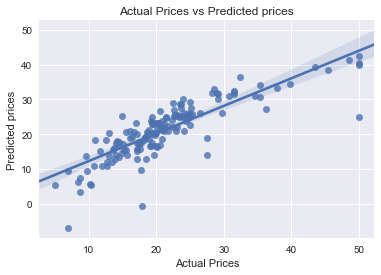

In [23]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

In [24]:
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
# The mean absoulute error
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
# The RMSE
print("RMSE: %.2f" %np.sqrt(mean_squared_error(y_test, y_pred)))
# R2 score
print("R2 Score: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 21.54
Mean absolute error: 3.17
RMSE: 4.64
R2 Score: 0.71


C:\Users\ruchi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


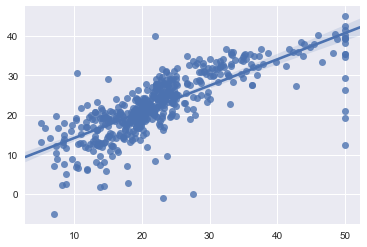

In [25]:
from sklearn.cross_validation import cross_val_predict
predictions = cross_val_predict(lr, X, y, cv=10)
sns.regplot(x=y, y=predictions)

In [26]:
accuracy_full = r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy_full)

Cross-Predicted Accuracy: 0.5901773933319263


Text(0,0.5,'Residuals')

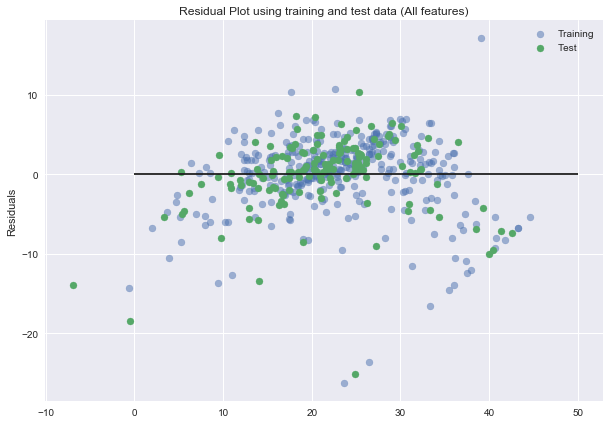

In [27]:
label = ['Training','Test']
plt.figure(figsize=(10,7))
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c='b', alpha=0.5,label=label)
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c='g',label = label)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training and test data (All features)')
plt.legend(label)
plt.ylabel('Residuals')

## Linear Regression - Selected Features from Forward Selection 

In [28]:
feature_cols = ['LSTAT', 'RM','PTRATIO','DIS','NOX','ZN']
X_feature = X[feature_cols]
X_feature.head()


,LSTAT,RM,PTRATIO,DIS,NOX,ZN
0,4.98,6.575,15.3,4.0900,0.538,18.0
1,9.14,6.421,17.8,4.9671,0.469,0.0
2,4.03,7.185,17.8,4.9671,0.469,0.0
3,2.94,6.998,18.7,6.0622,0.458,0.0
4,5.33,7.147,18.7,6.0622,0.458,0.0


In [29]:
X_feature.shape

(506, 6)

In [30]:
y.shape

(506,)

In [31]:
## Splitting the dataset into Training and testing subsets
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size = 0.3,random_state = 42)

In [32]:
X_train_feature.shape

(354, 6)

In [33]:
X_test_feature.shape

(152, 6)

In [34]:
#instantiate
lrs = LinearRegression()

# fitting the model to the training data (learn the coefficients)
lrs.fit(X_train_feature, y_train_feature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# Intercept and Coefficients
print(lrs.intercept_)
print(lrs.coef_)

34.222867034755005
[ -0.62912069   4.1173244   -0.91278748  -1.25640566 -14.89624906
   0.02445946]


In [36]:
# pairing the feature names with the coefficients
list(zip(feature_cols, lrs.coef_))

[('LSTAT', -0.6291206850599665),
 ('RM', 4.117324404175308),
 ('PTRATIO', -0.9127874756431918),
 ('DIS', -1.2564056580123293),
 ('NOX', -14.896249060958304),
 ('ZN', 0.024459458398917867)]

In [37]:
#Making Prediction
y_pred_selected = lrs.predict(X_test_feature)

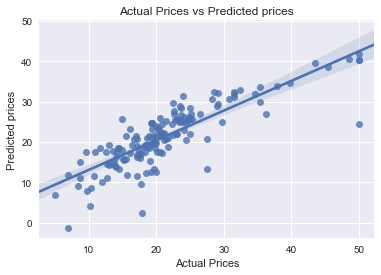

In [38]:
sns.regplot(x=y_test_feature, y=y_pred_selected)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

In [39]:
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test_feature, y_pred_selected))
# The mean absoulute error
print("Mean absolute error: %.2f" %mean_absolute_error(y_test_feature, y_pred_selected))
# The RMSE
print("RMSE: %.2f" %np.sqrt(mean_squared_error(y_test_feature, y_pred_selected)))
# R2 score
print("R2 Score: %.2f" % r2_score(y_test_feature, y_pred_selected))

Mean squared error: 22.14
Mean absolute error: 3.28
RMSE: 4.71
R2 Score: 0.70


In [40]:
#10-fold cross validation 
from sklearn.cross_validation import cross_val_score
scores_selected = cross_val_score(lrs, X_feature, y, cv=10)
print ('Cross-validated scores:', scores_selected)

Cross-validated scores: [ 0.71315626  0.43097088 -0.77714218  0.63278187  0.59958364  0.72230185
  0.33235119  0.04808377 -0.7916677   0.4586414 ]


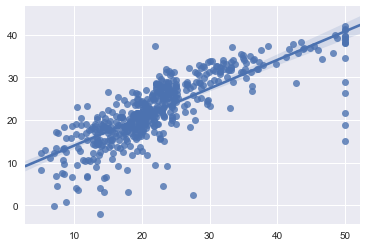

In [41]:
from sklearn.cross_validation import cross_val_predict
predictions_selected= cross_val_predict(lrs, X_feature, y, cv=10)
sns.regplot(x=y, y=predictions_selected)

In [42]:
accuracy_selected = r2_score(y, predictions_selected)
print ('Cross-Predicted Accuracy:', accuracy_selected)

Cross-Predicted Accuracy: 0.6231422955191848


Text(0,0.5,'Residuals')

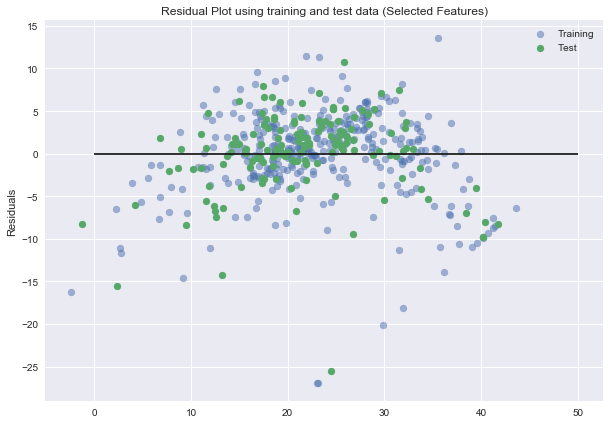

In [43]:
label = ['Training','Test']
plt.figure(figsize=(10,7))
plt.scatter(lrs.predict(X_train_feature), lrs.predict(X_train_feature) - y_train_feature, c='b', alpha=0.5,label=label)
plt.scatter(lrs.predict(X_test_feature), lrs.predict(X_test_feature) - y_test_feature, c='g',label = label)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training and test data (Selected Features)')
plt.legend(label)
plt.ylabel('Residuals')

## Lasso Regression

In [44]:
lasso = Lasso(alpha=0.5)
lassoreg = lasso.fit(X_train, y_train)

In [45]:
# Intercept and Coefficients
print(lassoreg.intercept_)
print(lassoreg.coef_)

29.061738988462828
[-1.11428643e-01  3.78770497e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.72430895e+00 -1.82413329e-03 -8.83422313e-01
  2.13912352e-01 -1.03937187e-02 -7.34073134e-01  1.20400361e-02
 -6.90496593e-01]


In [46]:
# pairing the feature names with the coefficients
list(zip(boston.feature_names, lassoreg.coef_))

[('CRIM', -0.11142864276708264),
 ('ZN', 0.037877049719092684),
 ('INDUS', -0.0),
 ('CHAS', 0.0),
 ('NOX', -0.0),
 ('RM', 2.7243089471693986),
 ('AGE', -0.0018241332935675558),
 ('DIS', -0.8834223128249176),
 ('RAD', 0.21391235227596622),
 ('TAX', -0.010393718656542922),
 ('PTRATIO', -0.7340731341555937),
 ('B', 0.012040036083841259),
 ('LSTAT', -0.6904965926291238)]

In [47]:
#Making Prediction
y_pred_lasso = lassoreg.predict(X_test)

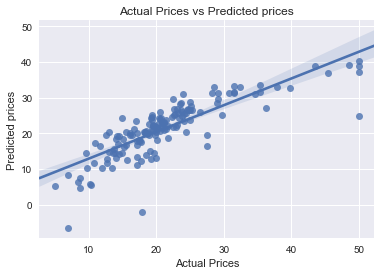

In [48]:
sns.regplot(x=y_test, y=y_pred_lasso)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

In [49]:
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred_lasso))
# The mean absoulute error
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred_lasso))
# The RMSE
print("RMSE: %.2f" %np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
# R2 score
print("R2 Score: %.2f" % r2_score(y_test, y_pred_lasso))

Mean squared error: 23.58
Mean absolute error: 3.40
RMSE: 4.86
R2 Score: 0.68


In [50]:
#10-fold cross validation 
from sklearn.cross_validation import cross_val_score
scores_lasso = cross_val_score(lassoreg, X, y, cv=10)
print ('Cross-validated scores:', scores_lasso)

Cross-validated scores: [ 0.71139596  0.48051574 -0.30096427  0.50721629  0.50017145  0.64715532
  0.21736648  0.10601646 -0.48428391  0.30425436]


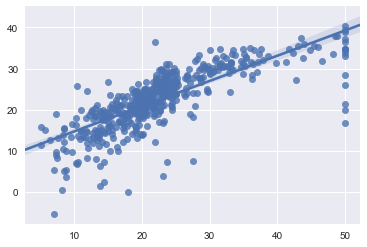

In [51]:
from sklearn.cross_validation import cross_val_predict
predictions_lasso = cross_val_predict(lassoreg, X, y, cv=10)
sns.regplot(x=y, y=predictions_lasso)

In [52]:
accuracy_lasso = r2_score(y, predictions_lasso)
print ('Cross-Predicted Accuracy:', accuracy_lasso)

Cross-Predicted Accuracy: 0.6101498568212791


Text(0,0.5,'Residuals')

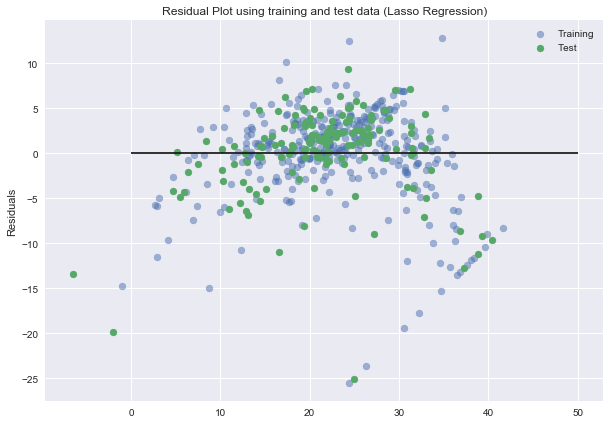

In [53]:
label = ['Training','Test']
plt.figure(figsize=(10,7))
plt.scatter(lassoreg.predict(X_train), lassoreg.predict(X_train) - y_train, c='b', alpha=0.5,label=label)
plt.scatter(lassoreg.predict(X_test), lassoreg.predict(X_test) - y_test, c='g',label = label)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training and test data (Lasso Regression)')
plt.legend(label)
plt.ylabel('Residuals')

## Ridge Regression

In [54]:
ridge = Ridge(alpha=0.5)
ridgereg = ridge.fit(X_train, y_train)

In [55]:
# Intercept and Coefficients
print(ridgereg.intercept_)
print(ridgereg.coef_)

28.393240990556215
[-1.29236654e-01  3.64971058e-02  2.88970946e-02  3.01622218e+00
 -1.04375437e+01  4.05947669e+00 -1.50871499e-02 -1.31079742e+00
  2.30463009e-01 -9.12916163e-03 -8.55894580e-01  1.20668991e-02
 -5.58394890e-01]


In [56]:
# pairing the feature names with the coefficients
list(zip(boston.feature_names, ridgereg.coef_))

[('CRIM', -0.1292366541363164),
 ('ZN', 0.03649710577412657),
 ('INDUS', 0.028897094638815714),
 ('CHAS', 3.016222181031595),
 ('NOX', -10.437543716861956),
 ('RM', 4.059476688006232),
 ('AGE', -0.015087149857797374),
 ('DIS', -1.3107974163101819),
 ('RAD', 0.2304630088242996),
 ('TAX', -0.009129161631188383),
 ('PTRATIO', -0.8558945801552923),
 ('B', 0.012066899115918033),
 ('LSTAT', -0.5583948901228625)]

In [57]:
#Making Prediction
y_pred_ridge = ridgereg.predict(X_test)

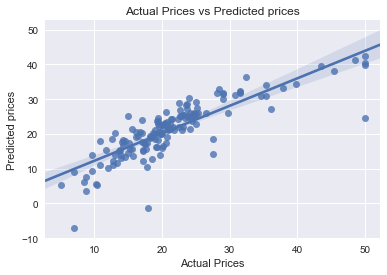

In [58]:
sns.regplot(x=y_test, y=y_pred_ridge)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

In [59]:
# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred_ridge))
# The mean absoulute error
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred_ridge))
# The RMSE
print("RMSE: %.2f" %np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
# R2 score
print("R2 Score: %.2f" % r2_score(y_test, y_pred_ridge))

Mean squared error: 21.85
Mean absolute error: 3.17
RMSE: 4.67
R2 Score: 0.71


In [60]:
#10-fold cross validation 
from sklearn.cross_validation import cross_val_score
scores_ridge = cross_val_score(ridgereg, X, y, cv=10)
print ('Cross-validated scores:', scores_ridge)

Cross-validated scores: [ 0.73347011  0.51024786 -0.6624728   0.63285428  0.56833056  0.74694162
  0.40124851 -0.13228276 -0.79745369  0.40613549]


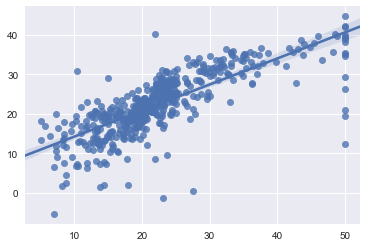

In [61]:
from sklearn.cross_validation import cross_val_predict
predictions_ridge = cross_val_predict(ridgereg, X, y, cv=10)
sns.regplot(x=y, y=predictions_ridge)

In [62]:
accuracy_ridge = r2_score(y, predictions_ridge)
print ('Cross-Predicted Accuracy:', accuracy_ridge)

Cross-Predicted Accuracy: 0.5956063179680515


Text(0,0.5,'Residuals')

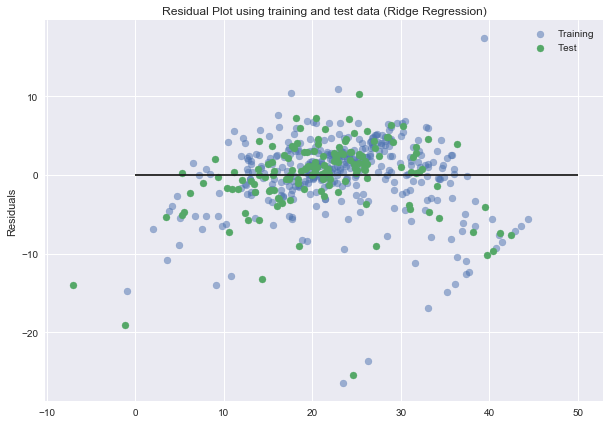

In [63]:
label = ['Training','Test']
plt.figure(figsize=(10,7))
plt.scatter(ridgereg.predict(X_train), ridgereg.predict(X_train) - y_train, c='b', alpha=0.5,label=label)
plt.scatter(ridgereg.predict(X_test), ridgereg.predict(X_test) - y_test, c='g',label = label)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training and test data (Ridge Regression)')
plt.legend(label)
plt.ylabel('Residuals')

In [64]:
#Accuracy_Scores = ['accuracy_full', 'accuracy_selected','accuracy_lasso','accuracy_ridge']
print("Accuracy(R2) Scores")
print("---------------")
print("Linear Regression with all Features:",accuracy_full)
print("Linear Regression with selected Features (based on forward selection):",accuracy_selected)
print("Lasso Regression:",accuracy_lasso)
print("Ridge Regression:",accuracy_ridge)

Accuracy(R2) Scores
---------------
Linear Regression with all Features: 0.5901773933319263
Linear Regression with selected Features (based on forward selection): 0.6231422955191848
Lasso Regression: 0.6101498568212791
Ridge Regression: 0.5956063179680515


## Conclusion

Based on the R2 Scores above we can conclude that our best model is the Linear Regression with our selected features  of LSTAT, RM, PTRATIO, DIS, NOX, ZN as it gave the highest cross validated R2 score compared to the rest.